# Irises Classification

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## PREPARE DATA

In [2]:
#Load dataset
cols = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Labels']
dataset = pd.read_csv("Dataset/iris.data",header = None, names=cols)

In [3]:
#Info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal length    150 non-null float64
Sepal width     150 non-null float64
Petal length    150 non-null float64
Petal width     150 non-null float64
Labels          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
dataset.head()

,Sepal length,Sepal width,Petal length,Petal width,Labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Change Labels column on One Hot Encoding
dataset = pd.get_dummies(dataset, prefix='Labels')

In [6]:
dataset.head()

,Sepal length,Sepal width,Petal length,Petal width,Labels_Iris-setosa,Labels_Iris-versicolor,Labels_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [7]:
#Split data on train and test
X_columns = dataset.drop(['Labels_Iris-setosa', 'Labels_Iris-versicolor', 'Labels_Iris-virginica'], axis=1)
Y_columns = dataset[['Labels_Iris-setosa', 'Labels_Iris-versicolor', 'Labels_Iris-virginica']]
X_train, X_test, y_train, y_test = train_test_split(X_columns, Y_columns, test_size = 0.4, shuffle=True)

In [8]:
X_train.shape

(90, 4)

In [9]:
y_train.shape

(90, 3)

In [10]:
#Standardize features
scaler = StandardScaler()
scaler.fit(X_train)
train_features = scaler.transform(X_train)
test_features = scaler.transform(X_test)

## CREATE MODEL

In [11]:
#Number of neurons in each layers
Input = 4
Hidden = 8
Output = 3

In [12]:
#Placeholders
X = tf.placeholder(tf.float32, [None, Input])
Y_true = tf.placeholder(tf.float32, [None, Output])

In [13]:
#Weights and biases
W1 = tf.Variable(tf.truncated_normal([Input, Hidden], stddev=0.1))
b1 = tf.Variable(tf.zeros([Hidden]))

W2 = tf.Variable(tf.truncated_normal([Hidden, Output], stddev=0.1))
b2 = tf.Variable(tf.zeros([Output]))

In [14]:
#Create layers
Y1 = tf.nn.relu(tf.matmul(X, W1) + b1)

#Softmax
Ylogits = tf.matmul(Y1, W2) + b2
Y = tf.nn.softmax(Ylogits)

In [15]:
#Loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_true)
cross_entropy = tf.reduce_mean(cross_entropy)
                                                          
#Accuracy
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Optimizer
train_step = tf.train.AdamOptimizer(learning_rate=0.003).minimize(cross_entropy)

## TRAIN MODEL

In [ ]:
#Epochs and batch size
num_epochs = 500
batchsize= 100

#Init global variables
init = tf.global_variables_initializer()

#Empty lists to plots
train_losses = list()
train_acc = list()
test_losses = list()
test_acc = list()

#Create session
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for i in range(0,len(train_features),batchsize):
            batch_X_train =X_train[i:i+batchsize]
            batch_Y_train =y_train[i:i+batchsize]
            
            #Two lines to visualization data (not to training)
            acc_trn, loss_trn = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X_train, Y_true: batch_Y_train})
            acc_tst, loss_tst = sess.run([accuracy, cross_entropy], feed_dict={X: X_test, Y_true: y_test})
            
            #Print statistics
            print("epoch{0} #{1} Trn acc={2:2.3f} , Trn loss={3:3.3f} Tst acc={4:2.3f} , Tst loss={5:3.3f}".format(epoch,i,acc_trn,loss_trn,acc_tst,loss_tst))
                
            #Add accuracy and loss to lists
            train_losses.append(loss_trn)
            train_acc.append(acc_trn)
            test_losses.append(loss_tst)
            test_acc.append(acc_tst)
            
            #TRAIN MODEL
            sess.run(train_step, feed_dict={X: batch_X_train, Y_true: batch_Y_train})

## PLOTS

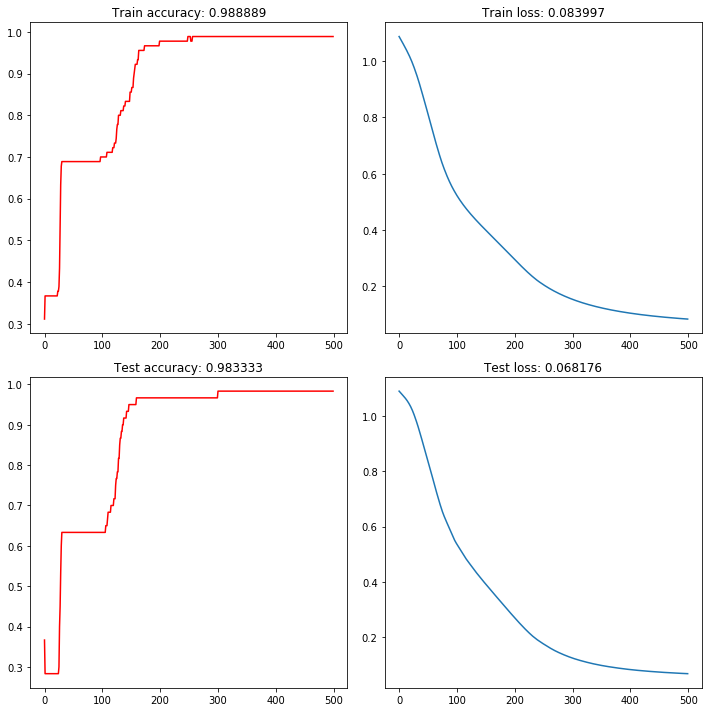

In [17]:
#Plots
fig = plt.figure(figsize=(10,10)) 
plt.subplot(2,2,1)
plt.title('Train accuracy: %f' %train_acc[-1])
plt.plot(range(len(train_acc)), train_acc, color='r')
plt.subplot(2,2,2)
plt.title('Train loss: %f' %train_losses[-1])
plt.plot(range(len(train_losses)), train_losses)
plt.subplot(2,2,3)
plt.title('Test accuracy: %f' %test_acc[-1])
plt.plot(range(len(test_acc)), test_acc, color='r')
plt.subplot(2,2,4)
plt.title('Test loss: %f' %test_losses[-1])
plt.plot(range(len(test_losses)), test_losses)
plt.tight_layout()